# EDA
- **Questions, whose answers are to be found :**
1) What are the primary Features influencing loan_status
2) Are there any outliers or anomalies?
3) How do categorical and numerical variable relate to the target?

#### Step 1: Data Loading and Initial Overview

- **Objective**: To load the dataset and get an overview of its structure, including:
  - Number of rows and columns.
  - Data types of each column.
  - Presence of missing values.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "train_data.csv"  # Update with your file path if necessary
train_data = pd.read_csv("train_data.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
train_data.head()

# Get an overview of the dataset
print("\nDataset Information:")
train_data.info()

# Check for missing values
print("\nMissing Values Summary:")
train_data.isnull().sum()


First 5 rows of the dataset:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          113705 non-null  int64  
 1   transaction_date     113705 non-null  object 
 2   sub_grade            113705 non-null  object 
 3   term                 113705 non-null  object 
 4   home_ownership       113705 non-null  object 
 5   cibil_score          113705 non-null  int64  
 6   total_no_of_acc      113705 non-null  int64  
 7   annual_inc           113705 non-null  float64
 8   int_rate             113705 non-null  float64
 9   purpose              113705 non-null  object 
 10  loan_amnt            113705 non-null  int64  
 11  application_type     113705 non-null  object 
 12  installment          113705 non-null  float64
 13  verification_status  113705 non-null  object 
 14  account_bal      

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64

#### Step 2: Target Variable Analysis

- **Objective**: To understand the distribution of the target variable (`loan_status`), which indicates whether a loan is defaulted (1) or not (0).

##### Key Outputs:
1. **Countplot**:
   - Visualizes the balance of `loan_status` in the dataset.
   - Helps identify class imbalance, which might need to be addressed during modeling.

2. **Default Rate**:
   - Calculates the percentage of loans that are in default.
   - Provides an overview of the risk distribution in the dataset.

#### Observations:
- A balanced or imbalanced target variable will guide the need for techniques like oversampling, undersampling, or weighted models.


C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\4122548696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_data, palette='pastel')


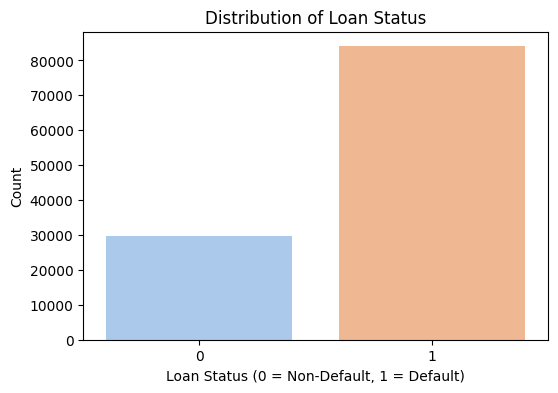

Default Rate: 73.89%


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=train_data, palette='pastel')
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.show()

# Calculate the default rate
default_rate = train_data['loan_status'].mean() * 100
print(f"Default Rate: {default_rate:.2f}%")


#### Step 3: Numerical Feature Analysis

- **Objective**: To analyze numerical features for:
  - Overall distribution and summary statistics.
  - Potential relationships with `loan_status`.

#### Key Outputs:
1. **Summary Statistics**:
   - Includes count, mean, min, max, and standard deviation for each numerical feature.

2. **Histograms**:
   - Visualizes the distribution of each feature, split by `loan_status`.
   - Helps identify patterns, such as ranges associated with defaults.

#### Observations:
- Features with distinct distributions for defaulters vs. non-defaulters are likely to be important predictors.
- For example, a lower `cibil_score` may correlate with a higher likelihood of default.


Summary Statistics for Numerical Features:
         cibil_score  total_no_of_acc    annual_inc       int_rate  \
count  113705.000000    113705.000000  1.137050e+05  113705.000000   
mean      684.398707         0.272934  7.138822e+04      15.955469   
std        22.871241         0.647328  6.050616e+04       3.234215   
min       660.000000         0.000000  0.000000e+00      12.050000   
25%       665.000000         0.000000  4.300000e+04      13.330000   
50%       680.000000         0.000000  6.000000e+04      14.990000   
75%       695.000000         0.000000  8.500000e+04      17.860000   
max       845.000000        10.000000  8.900060e+06      28.990000   

           loan_amnt    installment    account_bal     emp_length  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean    15158.144980     454.241150   15820.487094       5.959782  
std      9091.279851     268.251678   20447.614824       4.229570  
min      1000.000000      33.240000       0.000000    

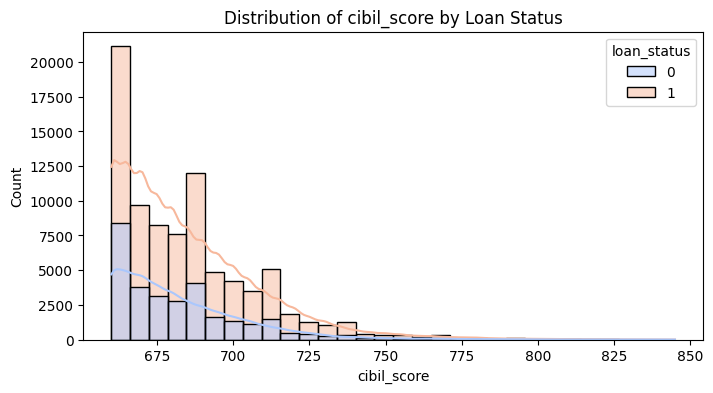

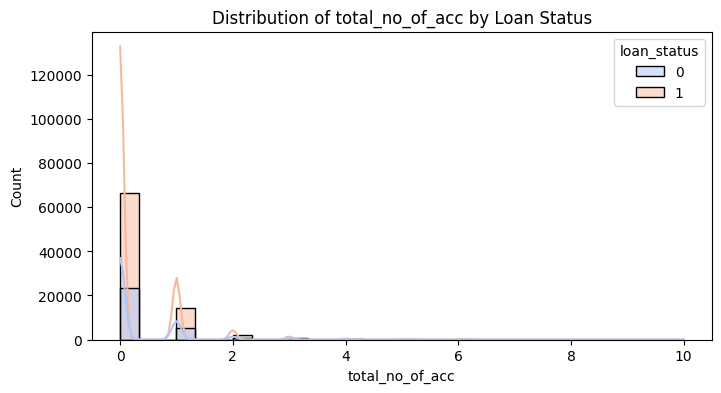

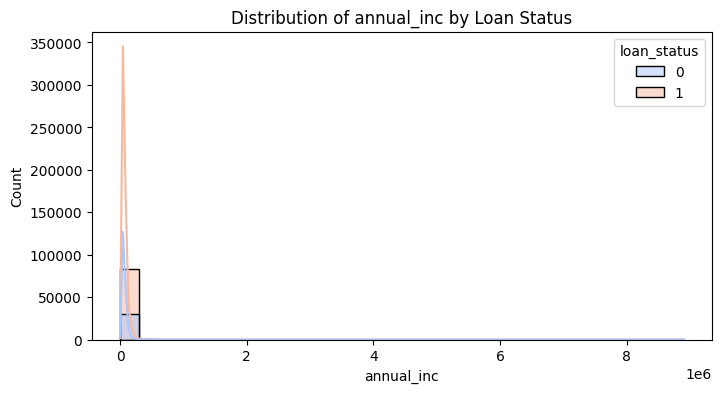

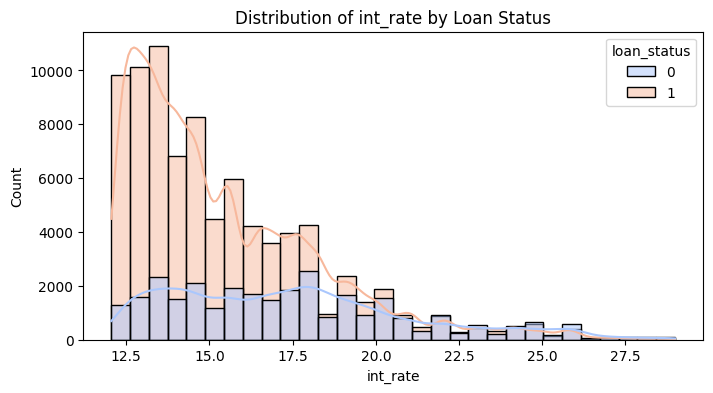

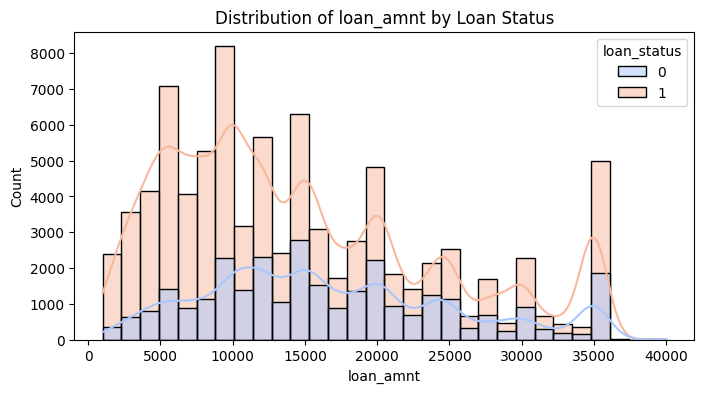

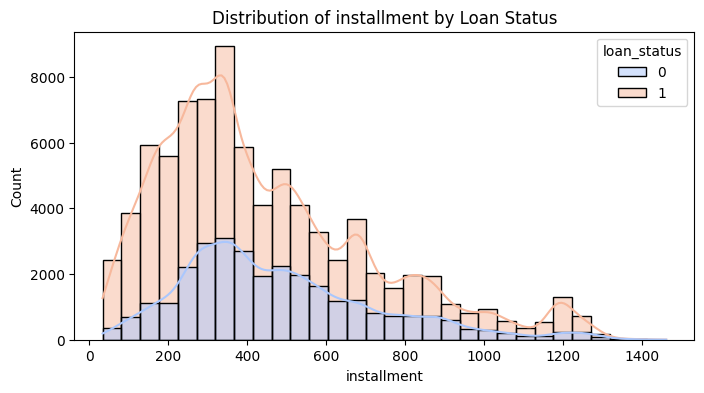

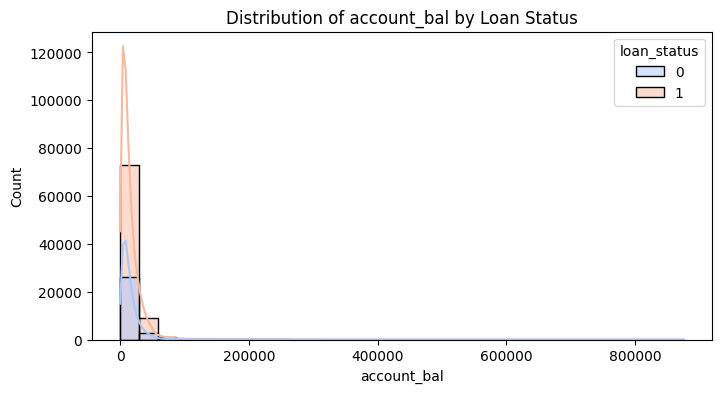

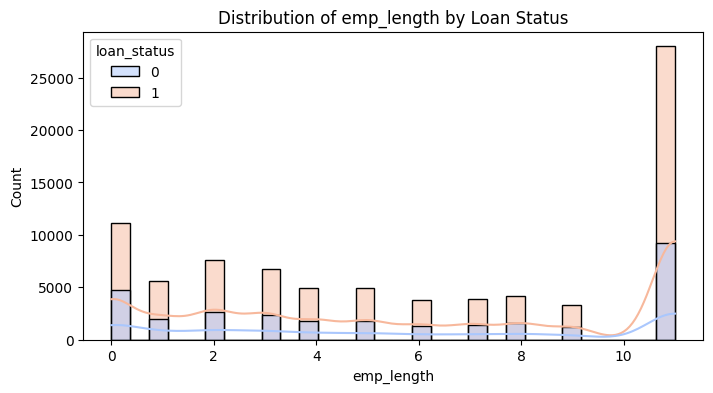

In [13]:
# Select numerical features
numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 
                      'loan_amnt', 'installment', 'account_bal', 'emp_length']

# Summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(train_data[numerical_features].describe())

# Histograms for individual numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_data, x=col, hue='loan_status', kde=True, bins=30, palette='coolwarm')
    plt.title(f"Distribution of {col} by Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


#### Step 4: Categorical Feature Analysis

- **Objective**: To explore categorical features and their relationship with the target variable (`loan_status`).

#### Key Outputs:
1. **Countplots**:
   - Visualize the distribution of each categorical feature, split by `loan_status`.
   - Identify categories associated with higher default rates.

2. **Default Rate by Category**:
   - Calculate the percentage of defaulters (`loan_status = 1`) within each category.


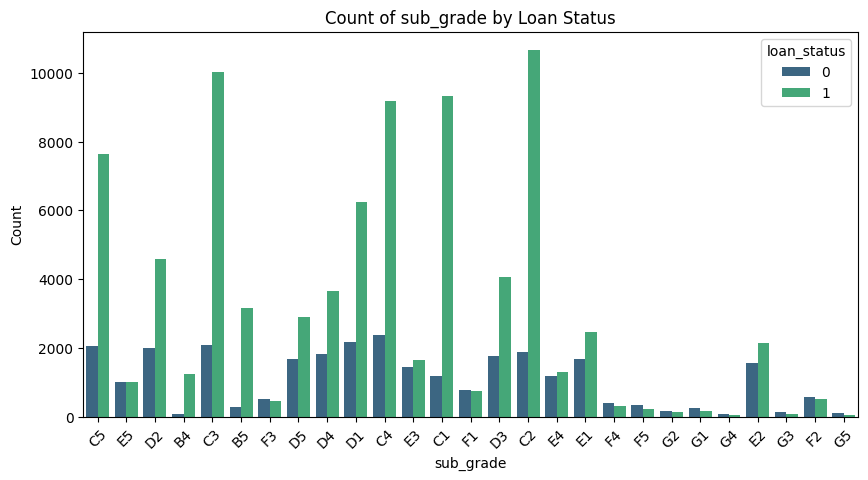

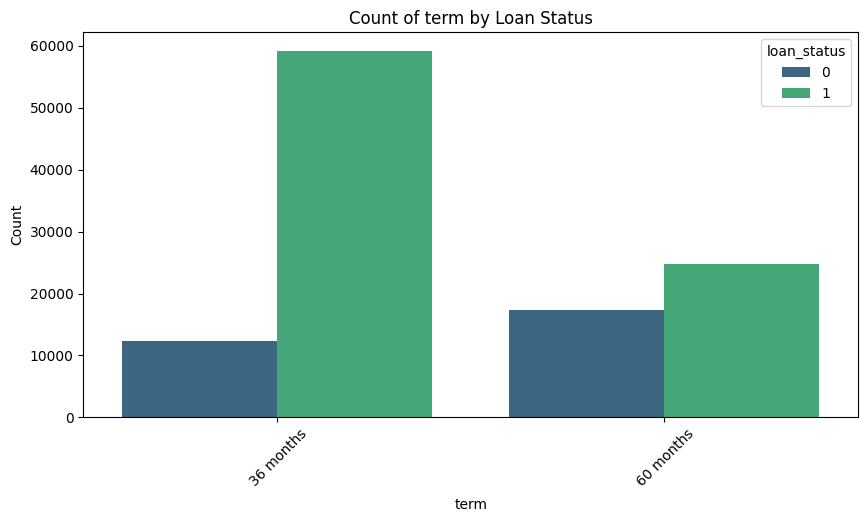

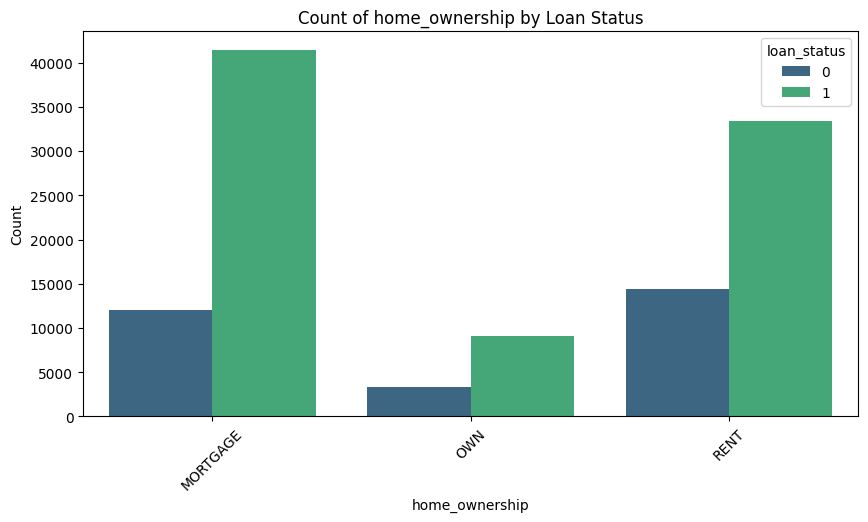

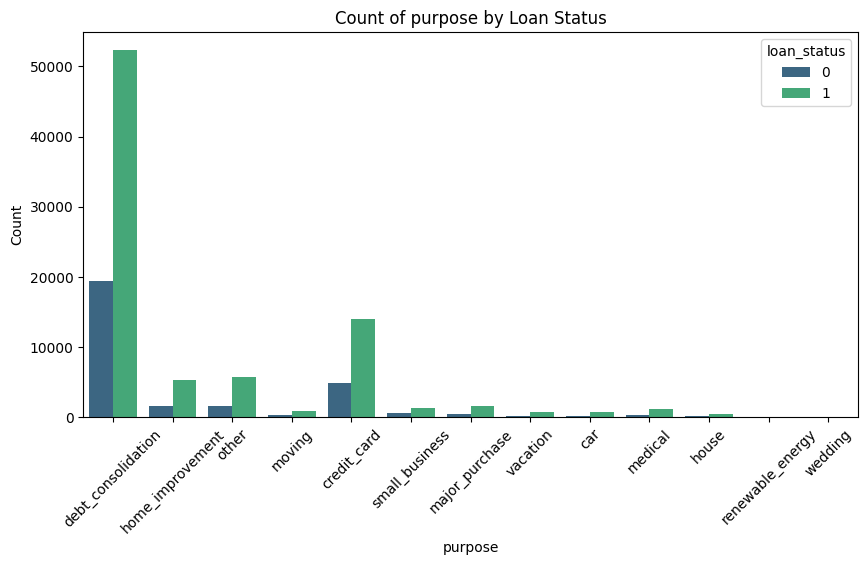

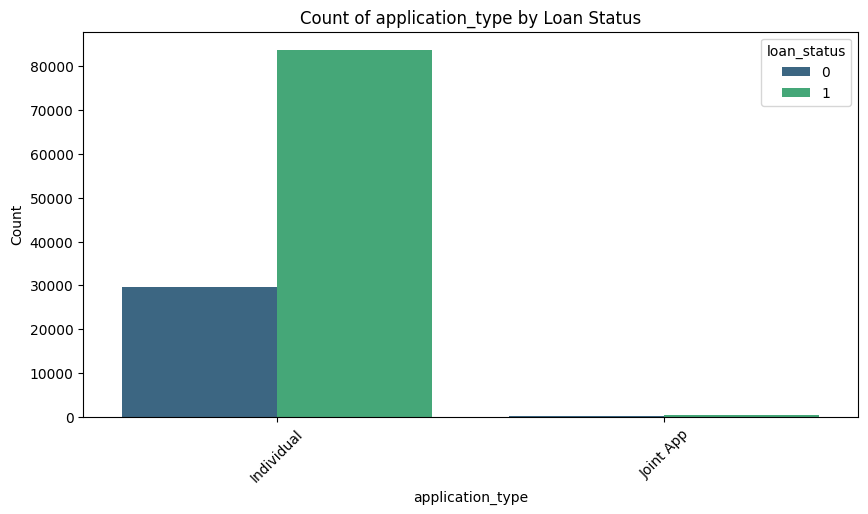

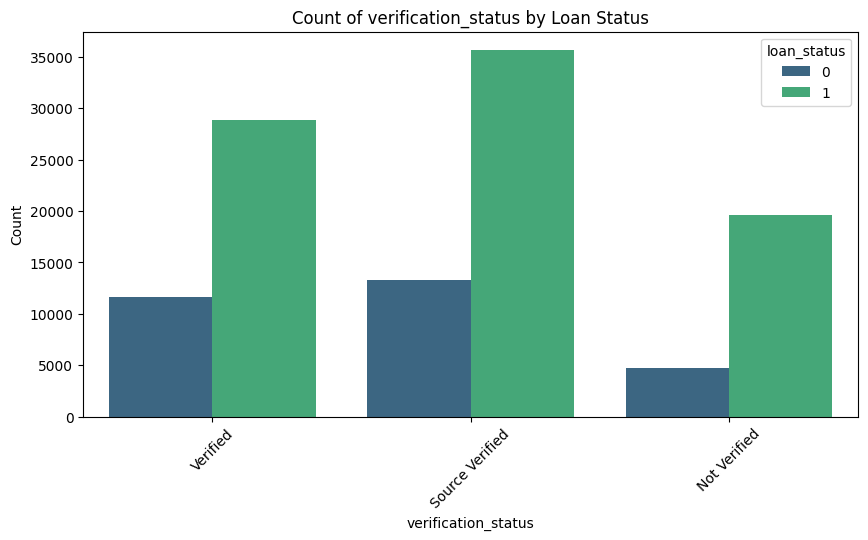


Loan Status Distribution by sub_grade:
loan_status         0         1
sub_grade                      
B4           0.063291  0.936709
B5           0.085475  0.914525
C1           0.113868  0.886132
C2           0.150450  0.849550
C3           0.171960  0.828040
C4           0.206094  0.793906
C5           0.213250  0.786750
D1           0.257293  0.742707
D2           0.302620  0.697380
D3           0.301650  0.698350
D4           0.331570  0.668430
D5           0.365301  0.634699
E1           0.405497  0.594503
E2           0.423669  0.576331
E3           0.468290  0.531710
E4           0.476095  0.523905
E5           0.499259  0.500741
F1           0.512290  0.487710
F2           0.532479  0.467521
F3           0.532778  0.467222
F4           0.567606  0.432394
F5           0.613475  0.386525
G1           0.598086  0.401914
G2           0.578778  0.421222
G3           0.594470  0.405530
G4           0.593333  0.406667
G5           0.647436  0.352564

Loan Status Distribution by ter

In [14]:
# Select categorical features
categorical_features = ['sub_grade', 'term', 'home_ownership', 'purpose', 
                        'application_type', 'verification_status']

# Countplot for each categorical feature
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col, hue='loan_status', palette='viridis')
    plt.title(f"Count of {col} by Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Analyzing loan_status distribution within categories
for col in categorical_features:
    print(f"\nLoan Status Distribution by {col}:")
    print(train_data.groupby(col)['loan_status'].value_counts(normalize=True).unstack())


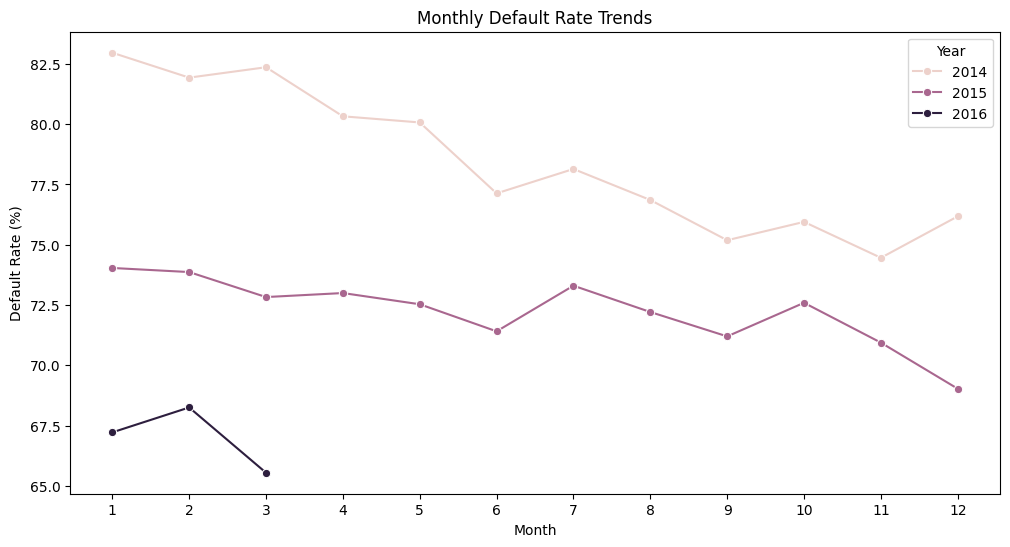

In [20]:
import matplotlib.dates as mdates

# Convert 'transaction_date' to datetime format
train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])

# Extract year and month for time-based analysis
train_data['year'] = train_data['transaction_date'].dt.year
train_data['month'] = train_data['transaction_date'].dt.month

# Compute monthly default rates
monthly_defaults = train_data.groupby(['year', 'month'])['loan_status'].mean().reset_index()
monthly_defaults['default_rate'] = monthly_defaults['loan_status'] * 100

# Plot default rate trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_defaults, x='month', y='default_rate', hue='year', marker='o')
plt.title("Monthly Default Rate Trends")
plt.xlabel("Month")
plt.ylabel("Default Rate (%)")
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.show()


#### Step 5: Numeric Data Correlation Analysis

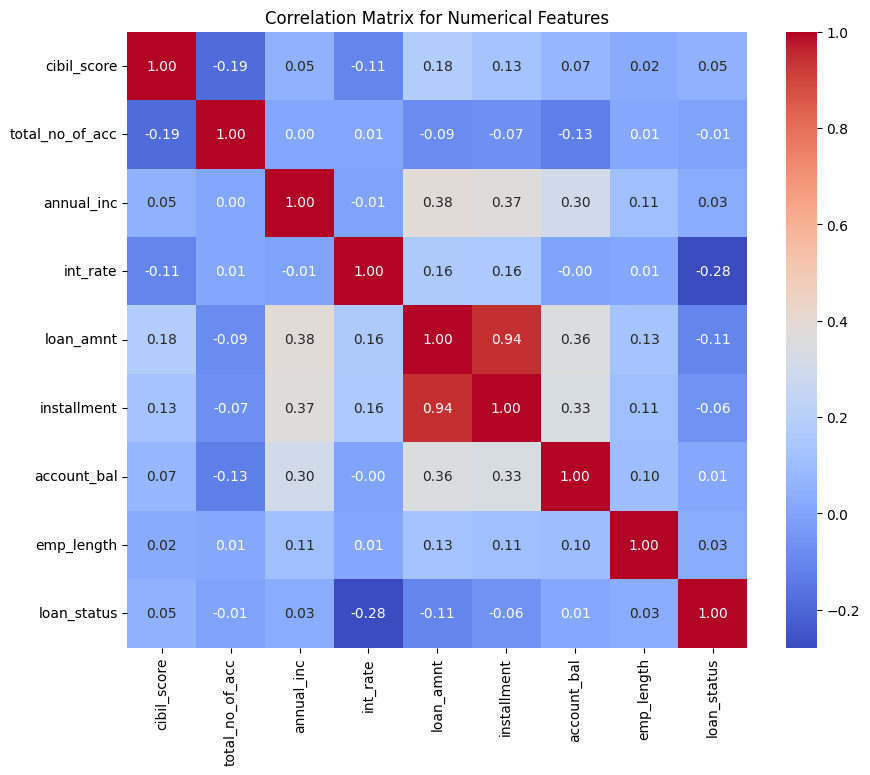


Correlation of Features with Loan Status:
loan_status        1.000000
cibil_score        0.053848
annual_inc         0.031050
emp_length         0.026188
account_bal        0.014416
total_no_of_acc   -0.008563
installment       -0.060676
loan_amnt         -0.106371
int_rate          -0.278462
Name: loan_status, dtype: float64


In [ ]:

numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 
                      'loan_amnt', 'installment', 'account_bal', 'emp_length', 'loan_status']


correlation_matrix = train_data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)
print("\nCorrelation of Features with Loan Status:")
print(correlation_with_target)


#### Step 6: Encoding Categorical Data and Correlation Analysis

#### **Objective**:
1. Encode categorical features to numerical representations for correlation analysis.
2. Identify significant relationships between encoded categorical features and `loan_status`.

#### **Encoding Approach**:
- **Label Encoding**: Applied to ordinal-like features such as `sub_grade`.
- **One-Hot Encoding**: Applied to nominal features such as `term`, `purpose`, and `home_ownership`.

#### Key Outputs:
1. **Correlation Values**:
   - Displays the strength of relationships between encoded categorical features and `loan_status`.
   - Highlights categorical features with significant influence on defaults.
2. **Heatmap**:
   - Visualizes correlations, showing how categorical and numerical features interact with `loan_status`.




Correlation of Categorical Features with Loan Status:
loan_status                            1.000000
purpose_other                          0.023726
purpose_vacation                       0.017661
purpose_home_improvement               0.016434
purpose_medical                        0.008949
purpose_moving                         0.008782
purpose_wedding                        0.004318
purpose_major_purchase                 0.004185
purpose_credit_card                    0.003157
purpose_renewable_energy               0.001251
purpose_house                          0.000168
home_ownership_OWN                    -0.003815
application_type_Joint App            -0.007543
purpose_small_business                -0.009202
verification_status_Source Verified   -0.021665
purpose_debt_consolidation            -0.030646
verification_status_Verified          -0.046126
home_ownership_RENT                   -0.076811
term_ 60 months                       -0.261951
Name: loan_status, dtype: float64

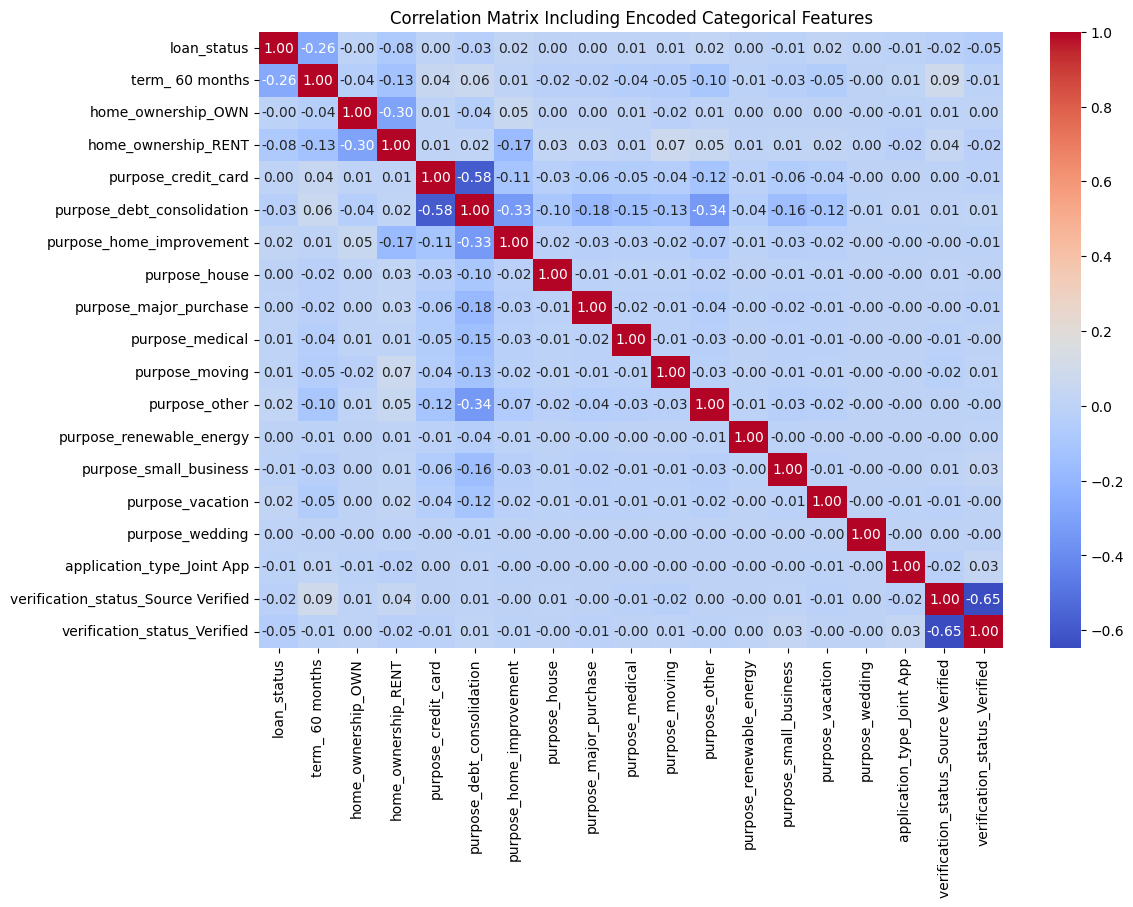

In [ ]:
# One-hot encode the nominal categorical features
categorical_features = ['term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)

correlation_features = ['loan_status'] + [col for col in train_data_encoded.columns if col.startswith(tuple(categorical_features))]

correlation_matrix_extended = train_data_encoded[correlation_features].corr()

correlation_with_target_cat = correlation_matrix_extended['loan_status'].sort_values(ascending=False)
print("\nCorrelation of Categorical Features with Loan Status:")
print(correlation_with_target_cat)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Encoded Categorical Features")
plt.show()


### Correlation of numeric and categorical features:

- **Numeric Features**
1) loan_status        1.000000
2) cibil_score        0.053848
3) annual_inc         0.031050
4) emp_length         0.026188
5) account_bal        0.014416
6) total_no_of_acc   -0.008563
7) installment       -0.060676
8) loan_amnt         -0.106371
9) int_rate          -0.278462

- **Categorical Features (One-Hot Encoded)**
1) loan_status                            1.000000
2) purpose_other                          0.023726
3) purpose_vacation                       0.017661
4) purpose_home_improvement               0.016434
5) purpose_medical                        0.008949
6) purpose_moving                         0.008782
7) purpose_wedding                        0.004318
8) purpose_major_purchase                 0.004185
9) purpose_credit_card                    0.003157
10) purpose_renewable_energy               0.001251
11) purpose_house                          0.000168
12) home_ownership_OWN                    -0.003815
13) application_type_Joint App            -0.007543
14) purpose_small_business                -0.009202
15) verification_status_Source Verified   -0.021665
16) purpose_debt_consolidation            -0.030646
17) verification_status_Verified          -0.046126
18) home_ownership_RENT                   -0.076811
19) term_ 60 months                       -0.261951

#### Step 7: Outlier Detection

#### **Objective**:
- Identify and analyze outliers in numerical features that may skew the dataset or impact model performance.

#### **Methodology**:
1. **Boxplots**:
   - Visualize outliers for each numerical feature.
2. **IQR Method**:
   - Calculate the interquartile range (IQR) for each feature.
   - Define outliers as values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
   - Summarize the number and percentage of outliers per feature.

#### Key Outputs:
1. **Boxplots**:
   - Highlights potential outliers visually for each numerical feature.
2. **Outlier Summary Table**:
   - Provides bounds, counts, and percentage of outliers for each feature.

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


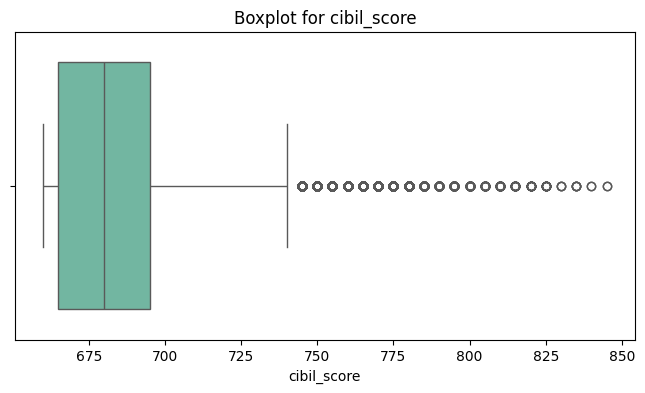

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


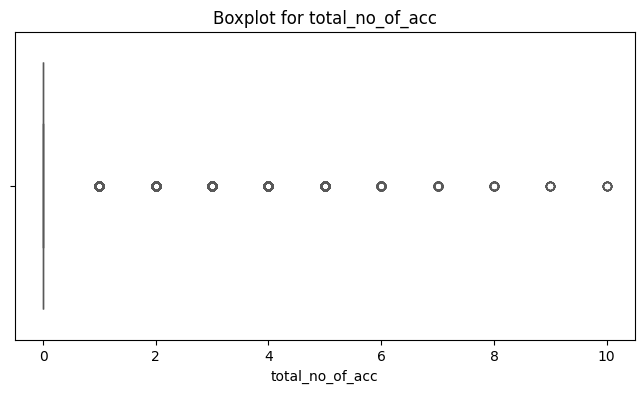

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


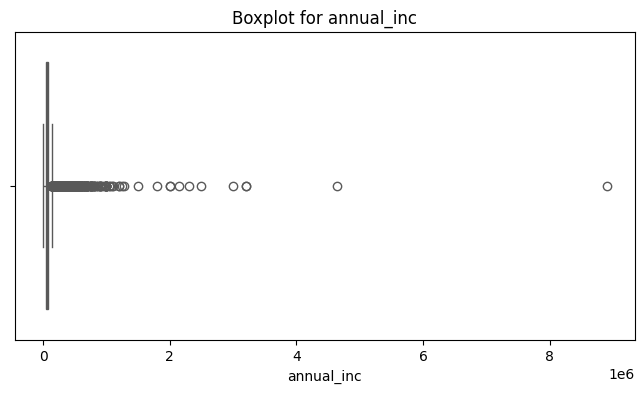

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


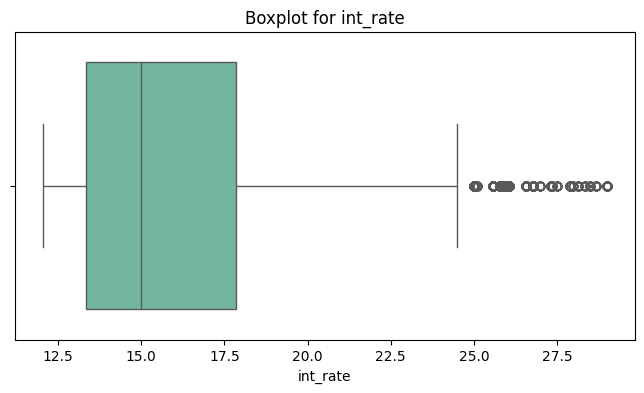

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


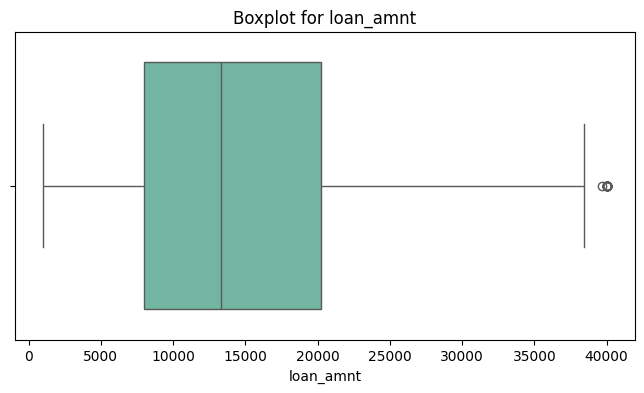

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


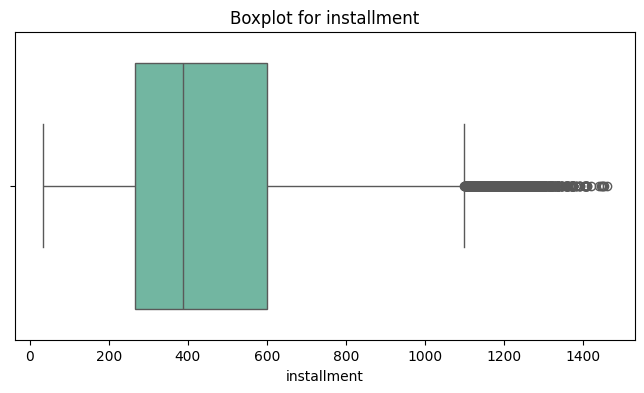

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


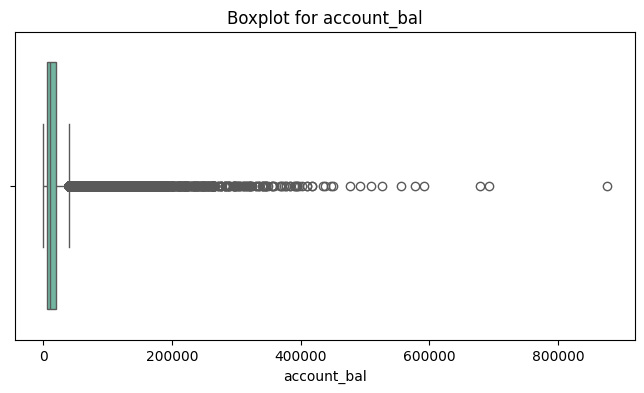

C:\Users\Ayush Panigrahi\AppData\Local\Temp\ipykernel_26476\1366917212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=col, palette='Set2')


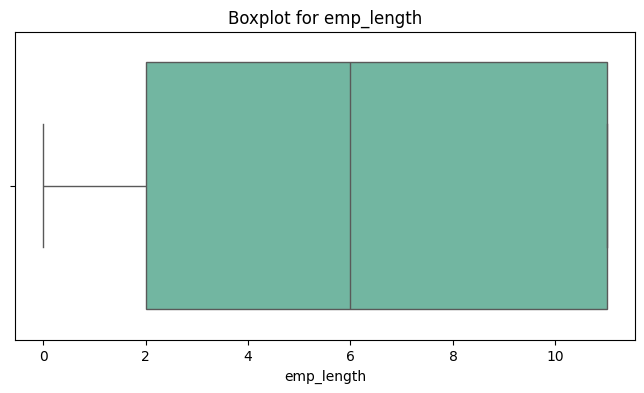


Outlier Summary:
                 Lower Bound  Upper Bound  Number of Outliers  \
cibil_score          620.000      740.000              2795.0   
total_no_of_acc        0.000        0.000             23789.0   
annual_inc        -20000.000   148000.000              5864.0   
int_rate               6.535       24.655              2634.0   
loan_amnt         -10337.500    38562.500                31.0   
installment         -234.945     1100.215              3735.0   
account_bal       -15383.000    40721.000              6417.0   
emp_length           -11.500       24.500                 0.0   

                 Percent Outliers  
cibil_score              2.458115  
total_no_of_acc         20.921683  
annual_inc               5.157205  
int_rate                 2.316521  
loan_amnt                0.027264  
installment              3.284816  
account_bal              5.643551  
emp_length               0.000000  


In [21]:
# Boxplot for outlier detection in numerical features
numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 
                      'loan_amnt', 'installment', 'account_bal', 'emp_length']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_data, x=col, palette='Set2')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

# Identify outliers using IQR method
outlier_summary = {}
for col in numerical_features:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    outlier_summary[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "num_outliers": len(outliers),
        "percent_outliers": len(outliers) / len(train_data) * 100
    }

# Display outlier summary
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df.columns = ['Lower Bound', 'Upper Bound', 'Number of Outliers', 'Percent Outliers']
print("\nOutlier Summary:")
print(outlier_summary_df)


#### Step 8: Outlier Handling

#### **Objective**:
- Reduce the impact of extreme values on the dataset by capping outliers.

#### **Methodology**:
1. **Capping Outliers**:
   - For each feature, replace values below the lower bound with the lower bound.
   - Replace values above the upper bound with the upper bound.

#### Key Outputs:
- Reduces skewness caused by extreme values.
- Preserves the majority of the data while mitigating the impact of outliers.

In [22]:

features_to_cap = ['cibil_score', 'total_no_of_acc', 'annual_inc', 
                   'int_rate', 'installment', 'account_bal']

for col in features_to_cap:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)

print("Outliers have been capped.")


Outliers have been capped.


# Feature Engineering and Selection

### Minimal Feature Engineering Plan

#### **1. Encode Categorical Variables**
- Apply one-hot encoding for nominal features like:
  - `purpose`
  - `term`
  - `home_ownership`
  - `application_type`
  - `verification_status`

#### **2. Group Rare Categories**
- Combine low-frequency categories in features like `purpose` into a single "Other" group to reduce noise and improve model generalization.

#### **3. Engineer Time-Based Features**
- Extract new features from `transaction_date`:
  - `transaction_month`
  - `transaction_year`
- These features may capture seasonal or temporal patterns in loan defaults.

#### **4. Feature Selection**
- Drop irrelevant or redundant features, such as:
  - Unique identifiers like `customer_id`.
  - Features with near-zero correlation to the target variable (`loan_status`).

#### **5. Normalize/Scale Numerical Features (Optional)**
- Standardize or normalize features to ensure consistent scaling, particularly for algorithms sensitive to feature magnitudes, like:
  - `loan_amnt`
  - `annual_inc`
  - `cibil_score`
  - Other numerical features.


In [ ]:
# One-Hot Encode Nominal Categorical Features
categorical_features = ['term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)

# Group Rare Categories in 'purpose'
purpose_counts = train_data['purpose'].value_counts()
rare_purposes = purpose_counts[purpose_counts < 500].index 
train_data['purpose'] = train_data['purpose'].replace(rare_purposes, 'other')

# Extract Time-Based Features
train_data['transaction_month'] = train_data['transaction_date'].dt.month
train_data['transaction_year'] = train_data['transaction_date'].dt.year

# Drop Irrelevant Columns
irrelevant_columns = ['customer_id', 'transaction_date']  
train_data_cleaned = train_data.drop(columns=irrelevant_columns)

# Normalize/Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 
                      'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']
train_data_cleaned[numerical_features] = scaler.fit_transform(train_data_cleaned[numerical_features])

print("Feature engineering complete. Data is ready for modeling.")


Feature engineering complete. Data is ready for modeling.


### Evaluating the Engineered Features

1) Check Feature Importance ( Pre- model evaluation)
- **why ?**
  - Identify the most important features that contribute most to the model's performance.


- **How ?**
  - Use a model like Random Forest or Gradient Boosting to compute feature importances.




Feature Importance:
              Feature  Importance
6         account_bal    0.154873
5         installment    0.139879
2          annual_inc    0.138329
4           loan_amnt    0.122444
0         cibil_score    0.090822
3            int_rate    0.082543
10  sub_grade_encoded    0.075441
7          emp_length    0.072799
9               month    0.052795
11  transaction_month    0.052569
8                year    0.009113
12   transaction_year    0.008392
1     total_no_of_acc    0.000000


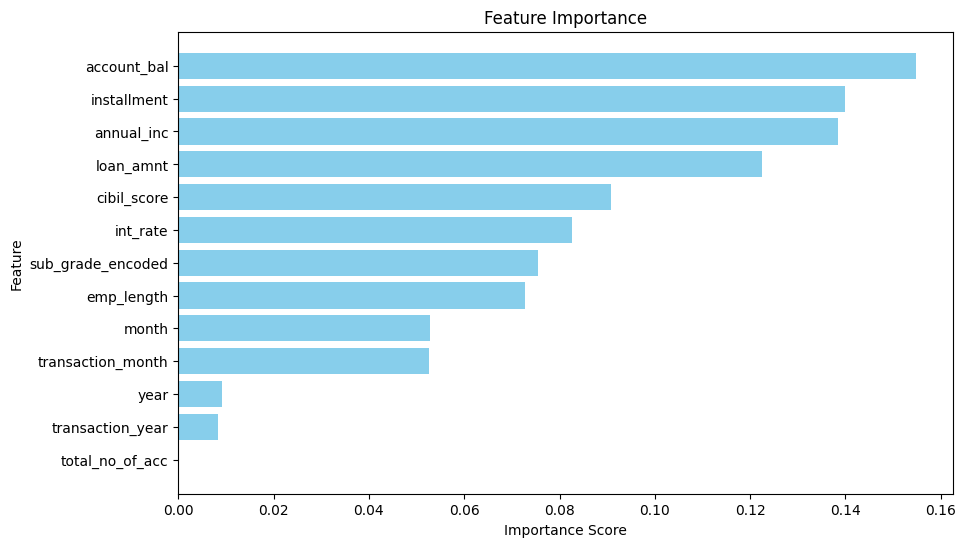

In [ ]:
# Drop 'loan_status' and 'C5' columns, ensuring only numeric features remain
X = train_data_cleaned.drop(columns=['loan_status', 'C5'], errors='ignore').select_dtypes(include=['number'])
y = train_data_cleaned['loan_status']

# Fit a Random Forest model
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


2) Multi-collinearity Check

- **why?**
  - Identify the correlation between features that could lead to overfitting or poor performance in the model.

- **How?**
    - Compute the Variance Inflation Factor (VIF) to detect multicollinearity.

- The Variance Inflation Factor (VIF) identifies multicollinearity, and a high VIF (typically >10) indicates redundancy or strong correlation between features, and thus shall be removed.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


c:\Users\Ayush Panigrahi\Desktop\dsw_solution_AyushPani\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\Ayush Panigrahi\Desktop\dsw_solution_AyushPani\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF):
              Feature           VIF
0         cibil_score  1.089515e+00
1     total_no_of_acc           NaN
2          annual_inc  1.566139e+00
3            int_rate  2.844947e+01
4           loan_amnt  1.179071e+01
5         installment  1.063836e+01
6         account_bal  1.380823e+00
7          emp_length  1.040688e+00
8                year           inf
9               month  1.631124e+08
10  sub_grade_encoded  9.214582e+01
11  transaction_month  5.234062e+07
12   transaction_year           inf


In [ ]:
# Drop highly collinear and redundant features
features_to_drop = ['transaction_month', 'month', 'transaction_year', 'year', 
                    'sub_grade_encoded', 'total_no_of_acc']

X_reduced = X.drop(columns=features_to_drop, errors='ignore')

vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("\nReduced Feature Set VIF:")
print(vif_data_reduced)



Reduced Feature Set VIF:
       Feature        VIF
0  cibil_score   1.087659
1   annual_inc   1.563196
2     int_rate   1.074046
3    loan_amnt  11.711555
4  installment  10.593044
5  account_bal   1.380632
6   emp_length   1.039980


3) Distribution and scale check:

- **why?**
    - Ensure that scaled features (e.g., after normalization) have consistent distributions.

- **How?**
  - Use a histogram or Q-Q plot to visualize the distribution of each feature.

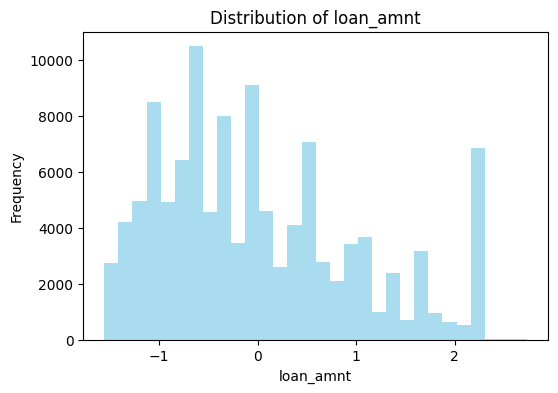

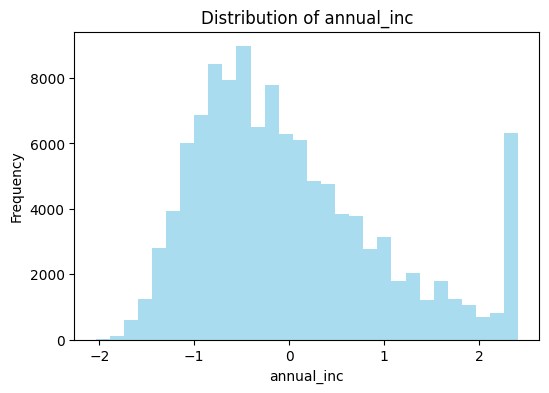

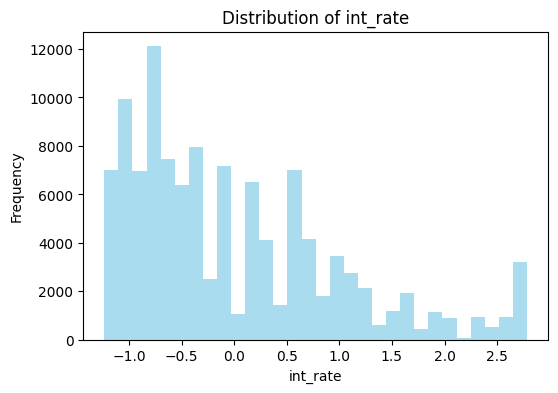

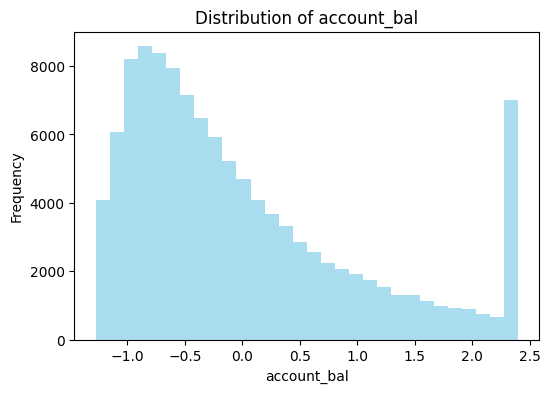

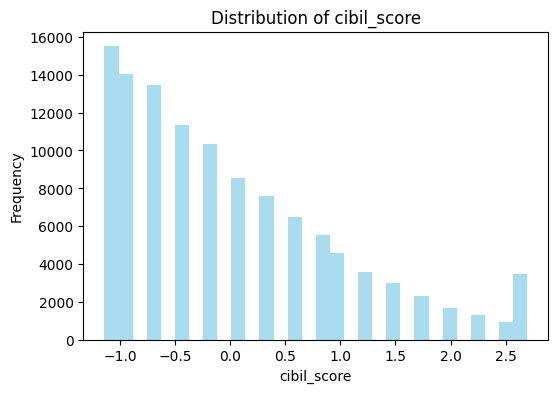

In [31]:
# Plot histograms for numerical features
numerical_features = ['loan_amnt', 'annual_inc', 'int_rate', 'account_bal', 'cibil_score']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(X[col], bins=30, color='skyblue', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


4) Predictive Power Evaluation

- **why?**
    - Validate that selected features can collectively predict the target variable.

- **How?**
    - Use a quick baseline model (e.g., Logistic Regression) and evaluate metrics like accuracy or AUC.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Fit a Logistic Regression model with increased iterations
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
auc_scores = cross_val_score(logistic_model, X_scaled, y, cv=5, scoring='roc_auc')

print(f"Baseline AUC after scaling: {np.mean(auc_scores):.4f}")


Baseline AUC after scaling: 0.7143


### AUC >= 0.7 is considered good... so ig we are good to goooooo

In [37]:
X_scaled

array([[-0.90237106,  0.0647698 ,  0.10094414, ..., -0.76066954,
        -0.85774332,  1.19166719],
       [-1.14225159, -0.08547957,  2.38434467, ..., -0.83983946,
        -0.00804539,  1.19166719],
       [-1.14225159,  0.15491942,  0.52509536, ..., -0.63106602,
         0.06731865,  1.19166719],
       ...,
       [ 0.29703162, -1.2874745 ,  0.11688968, ..., -0.37769907,
        -0.69987644, -0.69978618],
       [-0.18272945,  0.36526853, -0.19564279, ..., -0.04291899,
        -0.92696257,  0.24594051],
       [-0.90237106, -0.59632741,  1.29685922, ..., -0.51364546,
        -0.27507266, -1.17264952]], shape=(113705, 7))

In [38]:
# Save the processed data
X_reduced.to_csv("X_features.csv", index=False)
y.to_csv("y_labels.csv", index=False)
